# Numeric Approximation of 2-Wasserstein Distance

In [1]:
%matplotlib inline
import ot
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.rcParams['figure.figsize'] = (8, 8)

# Gaussian 1D


In [2]:
#from ot.datasets import get_1D_gauss as gauss
m1, s1 = 0, 1
m2, s2 = 5, 2

## Real Cost

In [3]:
(m1-m2)**2+(s1-s2)**2

26

## Histogram

In [31]:
from scipy.stats import norm
n = 200  # nb bins

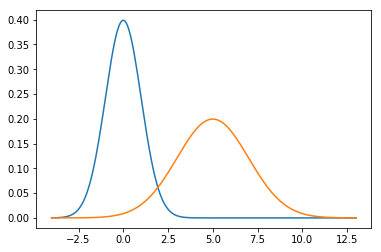

In [54]:
x = np.linspace(start=np.min([m1-4*s1, m2-4*s2]), stop=np.max([m1+4*s1, m2+4*s2]), num=n)
dx = (x[1]-x[0])
a = norm.pdf(x, m1, s1)
b = norm.pdf(x, m2, s2)
M_ = dx*ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M = M_/M_.max()

plt.plot(x,a)
plt.plot(x,b)

/home/grios/anaconda3/lib/python3.6/site-packages/ot/lp/__init__.py:98: UserWarning: Problem infeasible. Check that a and b are in the simplex
  result_code_string = check_result(result_code)


0.0

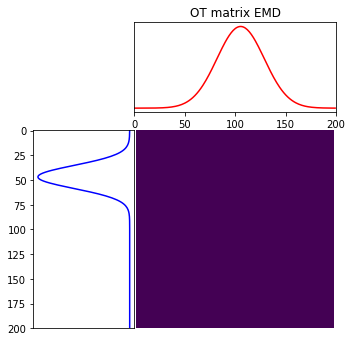

In [81]:
Gs = ot.emd(a, b, M)
plt.figure(1, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'OT matrix EMD')
(Gs*M_).sum()

26.0828683653131

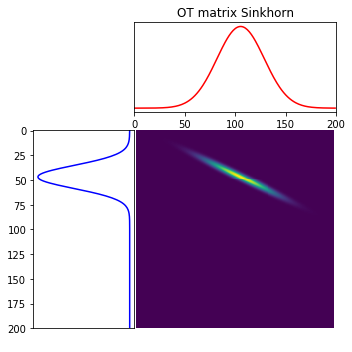

In [82]:
lambd = 0.0006165
Gs_reg = ot.sinkhorn(a, b, M, lambd)
plt.figure(1, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs_reg, 'OT matrix Sinkhorn')
(Gs_reg*M_).sum()

## Quantile

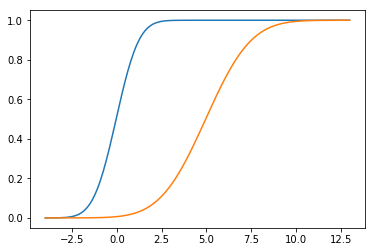

In [87]:
Fa = np.cumsum(a)*dx
Fb = np.cumsum(b)*dx

plt.plot(x, Fa)
plt.plot(x, Fb)

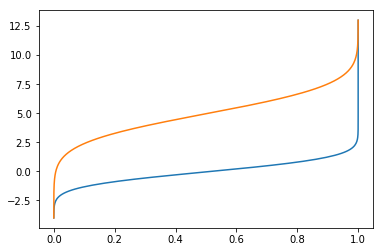

In [88]:
plt.plot(Fa, x)
plt.plot(Fb, x)

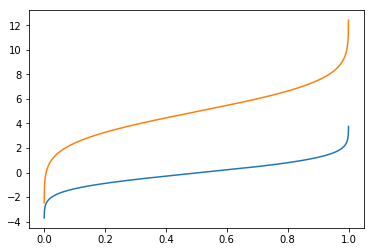

In [89]:
from scipy.interpolate import CubicSpline

n_a = np.argmax(Fa)
n_b = np.argmax(Fb)

Sa = CubicSpline(Fa[:n_a], x[:n_a])
Sb = CubicSpline(Fb[:n_b], x[:n_b])

u = np.linspace(0.0001, 0.9999, 1000)
du = u[1] - u[0]
plt.plot(u, Sa(u))
plt.plot(u, Sb(u))

In [90]:
du*np.sum((Sa(u) - Sb(u))**2)

26.03048943034474

## Empirical

In [28]:
n = 500
a, b = np.ones((n,)) / n, np.ones((n,)) / n 

n_costs = 500
cost = np.empty(n_costs)
cost_reg = np.empty(n_costs)

/home/grios/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(26.032551345243846, 1.0075664745524073)

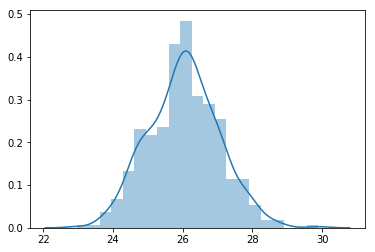

In [29]:
for i in range(n_costs):
    x = norm.rvs(m1, s1, size=n)
    y = norm.rvs(m2, s2, size=n)

    M_ = ot.dist(x.reshape((n, 1)), y.reshape((n, 1)))
    M = M_/M_.max()

    #sb.distplot(x, bins=n)
    #sb.distplot(y, bins=n)

    Gs= ot.emd(a, b, M, numItermax=1e8)
    c = (Gs*M_).sum()
    #print(c)
    cost[i]=c
    #lambd = 0.00075
    #Gs_reg = ot.sinkhorn(a, b, M, lambd)
    #cost_reg[i]=(Gs_reg*M_).sum()
sb.distplot(cost)
#sb.distplot(cost_reg)
cost.mean(), cost.std()

# Gaussian 2D

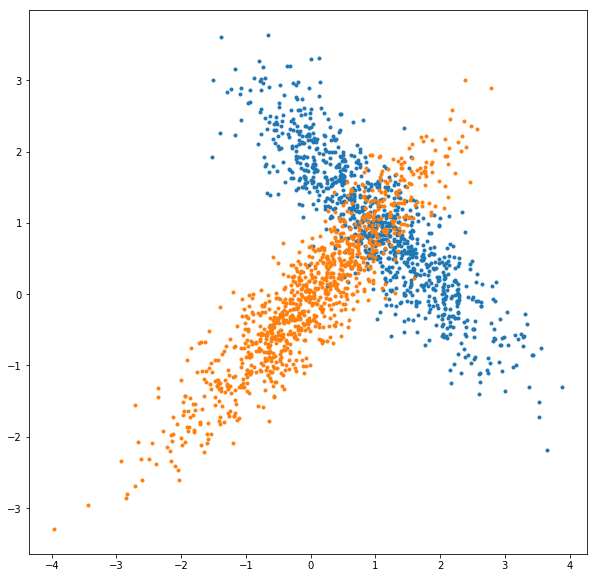

In [173]:
n = 1000

m1 = 1+np.zeros(2)
m2 = 0+np.zeros(2)

r1 = -0.89
r2 = 0.9

sigma1 = np.array([[1.0, r1], [r1, 1.0]])
sigma2 = np.array([[1.0, r2], [r2, 1.0]])


a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

plt.figure(1,(10,10))
G1 = np.random.multivariate_normal(m1, sigma1, n)
G2 = np.random.multivariate_normal(m2, sigma2, n)
plt.plot(G1[:, 0], G1[:, 1], '.', label='G1')
plt.plot(G2[:, 0], G2[:, 1], '.', label='G2')

## Real Cost

In [174]:
from tpy.wasserstein import w2_cost

np.sum((m1-m2)**2) +  w2_cost(sigma1, sigma2)**2

4.2161870391756375

## Empirical

In [175]:
n_costs = 300
cost = np.empty(n_costs)
cost_reg = np.empty(n_costs)

/home/grios/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(4.230667375096413, 0.14954831277594677)

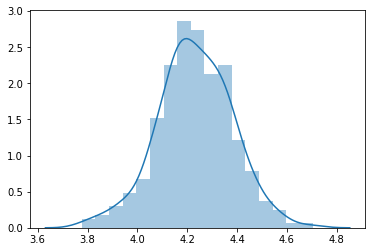

In [176]:
for i in range(n_costs):
    G1 = np.random.multivariate_normal(m1, sigma1, n)
    G2 = np.random.multivariate_normal(m2, sigma2, n)

    # loss matrix
    M_ = ot.dist(G1, G2)
    M = M_/M_.max()

    Gs= ot.emd(a, b, M, numItermax=1e8)
    cost[i]=(Gs*M_).sum()
    
    #lambd = 0.00075
    #Gs_reg = ot.sinkhorn(a, b, M, lambd)
    #cost_reg[i]=(Gs_reg*M_).sum()
    
sb.distplot(cost)
cost.mean(), cost.std()

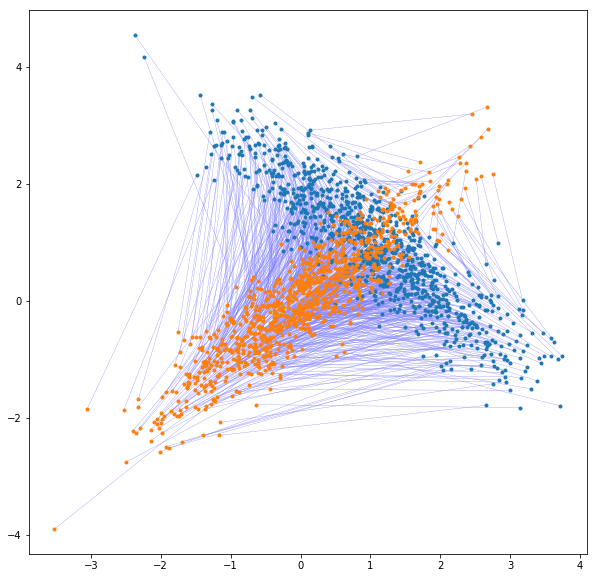

In [177]:
plt.figure(1, (10, 10))
ot.plot.plot2D_samples_mat(G1, G2, Gs, c=[.5, .5, 1], lw=0.3)
plt.plot(G1[:, 0], G1[:, 1], '.', label='G1')
plt.plot(G2[:, 0], G2[:, 1], '.', label='G2')